In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [73]:
df=pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course6-Capstone/Project 1 - Retail/Online Retail.xlsx")

In [74]:
#train_df=pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course6-Capstone/Project 1 - Retail/Project 3 datasets/train.xlsx")
#test_df=pd.read_excel("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course6-Capstone/Project 1 - Retail/Project 3 datasets/test.xlsx")

In [75]:
df.shape

(541909, 8)

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Let us now look at the total number of products, transactions, and customers in the data, which correspond to the total unique stock codes, invoice number, and customer IDs present in the data.

In [77]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


Thus, for 4070 products, there are 25900 transactions in the data. This means that each product is likely to have multiple transactions in the data. There are almost as many products as customers in the data as well.

In [78]:
#test_df.shape
#test_df.head()
#sh=[train_df,test_df]
#df=pd.concat(sh)
#df.reset_index(drop=True,inplace=True)
#print(df.shape)
#df.head()

# Data Cleaning

1. In this section, I have performed a preliminary data inspection and data cleaning.
    a. Checked for missing data and formulated an apt strategy to treat them.
    b. Removed duplicated data records.
    c. Performed descriptive analytics on the given data.

Invoice number is a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.So removing canceled transactions from the data.

In [79]:
#sp=df[df['InvoiceNo'].astype(str).str.startswith('C')]
#print(sp)
#s = pd.Series(df['InvoiceNo'])
#len(s.str.startswith('c'))
#df=df['InvoiceNo'].apply(str)
#df.InvoiceNo=df.InvoiceNo.astype(str)
#df['InvoiceNo'].value_counts().loc(lambda x : x.str.startswith('C')) #apply(lambda x : x.str.startswith('C')
#df['InvoiceNo']=df['InvoiceNo'].astype(str)
#print(df.dtypes)

#invoices = df['InvoiceNo']
sh0 = df['InvoiceNo'].str.contains('C', regex=True)
sh0.fillna(0,inplace=True)
sh0 = sh0.astype(int)
sh0.value_counts()

0    532621
1      9288
Name: InvoiceNo, dtype: int64

We have 9288 canceled transactions that we need to remove.

In [80]:
df['trans_canceled'] = sh0
df = df.loc[df['trans_canceled'] == 0,:]
df.reset_index(drop=True,inplace=True)
df['trans_canceled'].value_counts()
#df.head()

0    532621
Name: trans_canceled, dtype: int64

In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,trans_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [82]:
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        134697
Country                0
trans_canceled         0
dtype: int64

Checking if we have negative quantities against any InvoiceNo.

In [83]:
df.loc[df['Quantity'] < 0,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,trans_canceled
2380,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,0
4310,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,0
7105,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7106,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7107,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
526119,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0
526121,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
526122,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
527694,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,0


There were 1336 such cases.
We find out that CustomerID values are missing for those customers which have negative quantity values. Therefore, we will remove them too.

In [84]:
df = df[df['CustomerID'].notna()]    
df.reset_index(drop=True,inplace=True)

Erasing the rows from CusomerID column which has Nan values.

In [85]:
df.dropna(subset=['CustomerID'], inplace=True)
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
trans_canceled    0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397924 non-null  object        
 1   StockCode       397924 non-null  object        
 2   Description     397924 non-null  object        
 3   Quantity        397924 non-null  int64         
 4   InvoiceDate     397924 non-null  datetime64[ns]
 5   UnitPrice       397924 non-null  float64       
 6   CustomerID      397924 non-null  float64       
 7   Country         397924 non-null  object        
 8   trans_canceled  397924 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


Identifying and removing duplicated data records.

In [87]:
df.duplicated().sum()

5192

In [88]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Performing Descriptive Statistics on the given data:

In [89]:
df.describe()

,Quantity,UnitPrice,CustomerID,trans_canceled
count,392732.000000,392732.000000,392732.000000,392732.0
mean,13.153718,3.125596,15287.734822,0.0
std,181.588420,22.240725,1713.567773,0.0
min,1.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


Let's ignore CustomerID descriptive statistics.
Quantity and UnitPrice has potential outliers beyond 75th percentile and below 25th percentile.
Now let's get some insight on Customer's country column.

In [90]:
# counting unique values 
n = len(pd.unique(df['Country'])) 
  
print("No.of.unique values :",  n)
pd.unique(df['Country'])

No.of.unique values : 37


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

Invoices country wise:

In [91]:
#uniqueValues = (df['CustomerID'].append(df['Country'])).unique()
#uniqueValues=pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
#uniqueValues
#uniqueValues=pd.DataFrame(uniqueValues)
#print('Unique elements in column "InvoiceNo" & "Country" :')
#sortedUniqueValues=pd.DataFrame(uniqueValues).sort_values(by='CustomerID', ascending=False)
#sortedUniqueValues

uniqueValues = df.groupby(['Country'], as_index=False)['InvoiceNo'].count()
uniqueValues=uniqueValues.rename(columns={'Country':'Country','InvoiceNo' : 'Count'})
sortedUniqueValues=pd.DataFrame(uniqueValues).sort_values(by='Count', ascending=False)
sortedUniqueValues

,Country,Count
35,United Kingdom,349227
14,Germany,9027
13,France,8327
10,EIRE,7228
30,Spain,2480
23,Netherlands,2363
3,Belgium,2031
32,Switzerland,1842
26,Portugal,1453
0,Australia,1184


<AxesSubplot:title={'center':'transactions By Country'}, xlabel='Country'>

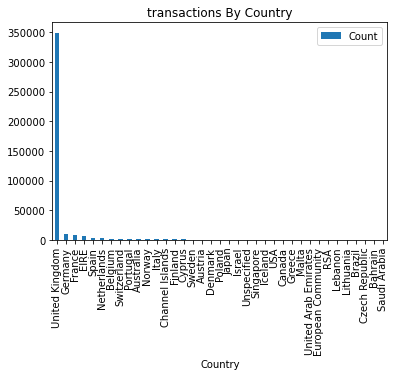

In [92]:
sortedUniqueValues.plot(kind="bar",x = 'Country', y = 'Count', title = 'transactions By Country')
#sortedUniqueValues.Country.value_counts()[:10].plot(kind='bar')

United Kingdom has maximum sales followed by Germany and France.
Let's find out which country has maximum purchase amount.
Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help us calculate the total purchased amount. So creating feature total amount of the transactions.

In [93]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,trans_canceled,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [94]:
uniqueValues1=pd.DataFrame(df.groupby('Country')['TotalAmount'].sum())
# print('Unique elements in column "TotalAmount" & "Country" :')
sortedUniqueValues1=pd.DataFrame(uniqueValues1).sort_values(by='TotalAmount', ascending=False)
print(sortedUniqueValues1)
#df.Country.value_counts()[:25].plot(kind='bar')

                       TotalAmount
Country                           
United Kingdom        7.285025e+06
Netherlands           2.854463e+05
EIRE                  2.652625e+05
Germany               2.286784e+05
France                2.089343e+05
Australia             1.384538e+05
Spain                 6.155856e+04
Switzerland           5.644395e+04
Belgium               4.119634e+04
Sweden                3.836783e+04
Japan                 3.741637e+04
Norway                3.616544e+04
Portugal              3.337584e+04
Finland               2.254608e+04
Singapore             2.127929e+04
Channel Islands       2.044054e+04
Denmark               1.895534e+04
Italy                 1.748324e+04
Cyprus                1.350285e+04
Austria               1.019868e+04
Poland                7.334650e+03
Israel                7.215840e+03
Greece                4.760520e+03
Iceland               4.310000e+03
Canada                3.666380e+03
USA                   3.580390e+03
Malta               

In [95]:
sortedUniqueValues1.head(10)

,TotalAmount
Country,
United Kingdom,7.285025e+06
Netherlands,2.854463e+05
EIRE,2.652625e+05
Germany,2.286784e+05
France,2.089343e+05
Australia,1.384538e+05
Spain,6.155856e+04
Switzerland,5.644395e+04
Belgium,4.119634e+04


UK ranked highest on Overall Purchases : greater than 7.28 Million £ and 
Saudi Arabia ranked lowest on Overall Purchases.

<AxesSubplot:title={'center':'Top 20 Spread of Purchases by Description'}, xlabel='Description'>

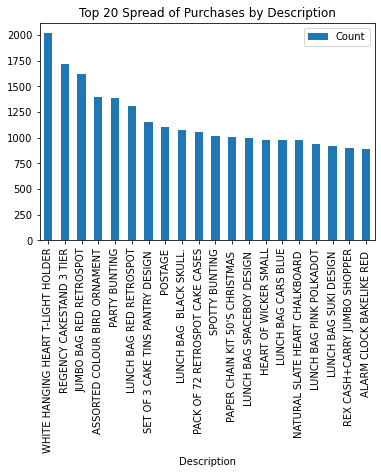

In [96]:
groupByDescription = df.groupby(["Description"], as_index=False)['InvoiceNo'].count().rename(columns={'Description':'Description','InvoiceNo' : 'Count'})
groupByDescription = groupByDescription.sort_values(by='Count', ascending=False).head(20)
groupByDescription.plot(kind = 'bar', x = 'Description', y = 'Count', title = 'Top 20 Spread of Purchases by Description')

Most Procured Item : White Hanging Heart T-Light Holder

# Data Transformation

    2. In this section, I have performed cohort analysis (a cohort is a group of subjects that share a defining characteristic).     Observed how a cohort behaves across time and compare it to other cohorts.
    a. Created month cohorts and analyzed active customers for each cohort.
    b. Analyzed the retention rate of customers.

I have created Time cohorts and looked at customers who remain active during particular cohorts over a period of time that they transact over. Time cohorts: It groups customers by their purchase behavior over time.

For Cohort Analysis, I have created two new columns, 'Yr_Month' and 'CohortMonth'.
Yr_Month - indicates the date of the transaction by taking the first day of the month and year of InvoiceDate for each transaction.
CohortMonth - indicates the date of the customer’s first transaction. To create this column we first group our dataset by 'Customer ID and then select the first purchase date by leveraging the min() function.
Then found the difference between 'Invoice_day' and 'Cohort_month' in terms of the number of months and call the column 'Diff_Months'.

In [97]:
df['Yr_Month'] = df['InvoiceDate'].dt.to_period('M')
grouping = df.groupby('CustomerID')['Yr_Month']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,trans_canceled,TotalAmount,Yr_Month,CohortMonth
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,2011-12,2011-08
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,2011-12,2011-08
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12,2011-08
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12,2011-08
397923,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0,14.85,2011-12,2011-08


In [98]:
#df['Yr_Month'] = pd.to_timestamp(df['Yr_Month'])
#df['CohortMonth'] = pd.to_datetime(df['COhortMonth'])
#df.info()
df['Diff_Months'] = (df.Yr_Month - df.CohortMonth).apply(attrgetter('n'))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,trans_canceled,TotalAmount,Yr_Month,CohortMonth,Diff_Months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12,2010-12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010-12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,2011-12,2011-08,4
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,2011-12,2011-08,4
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12,2011-08,4
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12,2011-08,4


Below I have created a cohort analysis matrix by grouping the data by Cohort_month and Index, which we created above. The values in the matrix represent unique customers who made a purchase during that time period. 

In [99]:
grouped_months = df.groupby(['CohortMonth', 'Diff_Months'])
df1 = grouped_months['CustomerID'].apply(pd.Series.nunique)
df1 = df1.reset_index()
cohort_matrix = df1.pivot(index='CohortMonth',columns='Diff_Months',values='CustomerID')
cohort_matrix

Diff_Months,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interpreting the Cohort Analysis Matrix:
Let's start by looking at one cohort. From left to right, we see that:
2010–Dec: This is the “cohort” - customers who made a purchase in Dec of 2010.
885: This is the number of customers in this cohort. So 885 customers purchased products in Dec of 2010.
324: This is the number of customers who purchased again in the next month. So in Jan 2010, 324 customers made a purchase, and 561 did not.
Each column after the “0” column shows the number of customers from that cohort after each month. So under the column 1, we can see that 324 out of 885 customers made a purchase in the first month, in the column 2, 286 out of 885 customers made a purchase, and so on.

Let us now calculate the Retention Rate. It is defined as the percentage of active customers out of total customers

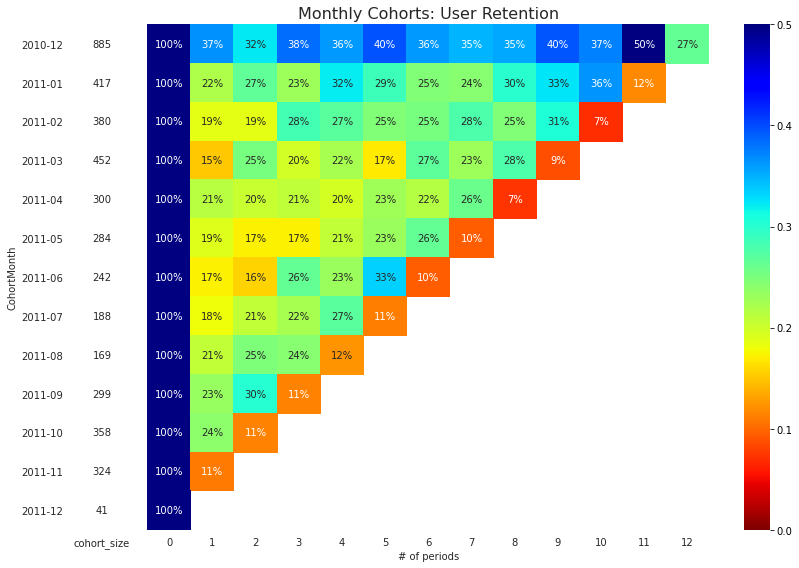

In [100]:
sizes = cohort_matrix.iloc[:,0]
retention_rateOf_custs = cohort_matrix.divide(sizes, axis=0)
retention_rateOf_custs.round(3) * 100
# The first month's retention rate is 100%. This is because the number of active customers in the first month is actually 
# the size of the cohort.
# Let us now visualize the retention rates by a heatmap.
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
#plt.figure(figsize=(10, 8))
#plt.title('Retention rates')
sns.heatmap(data = retention_rateOf_custs,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'jet_r',ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
ax[1].set(xlabel='# of periods',ylabel='')

#plt.show()


import matplotlib.colors as mcolors
cohort_size_df = pd.DataFrame(sizes).rename(columns={0: 'cohort_size'})
white_cmap = mcolors.ListedColormap(['white'])
sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

fig.tight_layout()

From the heatmap, we can see that for the Cohort_month: 2010–12–01, the average retention rate is approximately 37%, with the highest retention rate occurring after 11 months (50%).
For all the other CohortMonths, the average retention rates are around 18–28%. Only this percentage of users are making transactions again in the given CohortIndex ranges.
From this analysis, a company can understand and create strategies to increase customer retention by providing more attractive discounts or by doing more effective marketing, etc.

In [574]:
#For Cohort Analysis, I am creating a group of Countries and their purchased products.
#In the dataset, one of the columns we have is “InvoiceDate”, the day when a transaction was done. So we will create cohorts and look at customers who remain active during particular cohorts over a period of time.
#groupByDescription1 = df.groupby(["Description","Country","Yr_Month","TotalAmount"], as_index=False)['InvoiceNo'].count()
#groupByDescription1 = groupByDescription1.sort_values(by='TotalAmount', ascending=False)
#print(groupByDescription1)
#SHuniqueValues = (groupByDescription1['Country'].append(groupByDescription1['Description'])).unique()
#SHuniqueValues=uniqueValues.rename(columns={'Country':'Country','Description':'Description'})
#SHuniqueValues

"""grouping_Country = groupByDescription1.groupby('Country')

UnitedKingdom_info = grouping_Country.get_group('United Kingdom')
Netherlands_info = grouping_Country.get_group('Netherlands')
EIRE_info = grouping_Country.get_group('EIRE')
Germany_info = grouping_Country.get_group('Germany')
France_info = grouping_Country.get_group('France')
Australia_info = grouping_Country.get_group('Australia')
Switzerland_info = grouping_Country.get_group('Switzerland')
Spain_info = grouping_Country.get_group('Spain')
Belgium_info = grouping_Country.get_group('Belgium')
Sweden_info = grouping_Country.get_group('Sweden')
print("****************UK*****************************************************************************")
print(UnitedKingdom_info.head(3))
print("****************Netherlands***********************************************************************")
print(Netherlands_info.head(3))
print("****************EIRE******************************************************************************")
print(EIRE_info.head(3))
print("****************Germany***************************************************************************")
print(Germany_info.head(3))
print("****************France*****************************************************************************")
print(France_info.head(3))
print("****************Australia**************************************************************************")
print(Australia_info.head(3))
print("****************Switzerland************************************************************************")
print(Switzerland_info.head(3))
print("****************Spain*******************************************************************************")
print(Spain_info.head(3))
print("****************Belgium*********************************************************************************")
print(Belgium_info.head(3))
print("****************Sweden************************************************************************************")
print(Sweden_info.head(3)) 
#UnitedKingdom_info.plot(kind="barh", fontsize=4)
UnitedKingdom_info.value_counts().head(30)
df.head(5)"""

'grouping_Country = groupByDescription1.groupby(\'Country\')\n\nUnitedKingdom_info = grouping_Country.get_group(\'United Kingdom\')\nNetherlands_info = grouping_Country.get_group(\'Netherlands\')\nEIRE_info = grouping_Country.get_group(\'EIRE\')\nGermany_info = grouping_Country.get_group(\'Germany\')\nFrance_info = grouping_Country.get_group(\'France\')\nAustralia_info = grouping_Country.get_group(\'Australia\')\nSwitzerland_info = grouping_Country.get_group(\'Switzerland\')\nSpain_info = grouping_Country.get_group(\'Spain\')\nBelgium_info = grouping_Country.get_group(\'Belgium\')\nSweden_info = grouping_Country.get_group(\'Sweden\')\nprint("****************UK*****************************************************************************")\nprint(UnitedKingdom_info.head(3))\nprint("****************Netherlands***********************************************************************")\nprint(Netherlands_info.head(3))\nprint("****************EIRE***********************************************

# Data Modeling

1. In this section, I have built a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
2. Calculated RFM metrics.
3. Built RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
    b1. Combined three ratings to get a RFM segment (as strings).
    b2. Got the RFM score by adding up the three ratings.
    b3. Analyzed the RFM segments by summarizing them and commented on the findings.

In [101]:
df.describe()

,Quantity,UnitPrice,CustomerID,trans_canceled,TotalAmount,Diff_Months
count,392732.000000,392732.000000,392732.000000,392732.0,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822,0.0,22.629195,4.147668
std,181.588420,22.240725,1713.567773,0.0,311.083465,3.850225
min,1.000000,0.000000,12346.000000,0.0,0.000000,0.000000
25%,2.000000,1.250000,13955.000000,0.0,4.950000,0.000000
50%,6.000000,1.950000,15150.000000,0.0,12.390000,3.000000
75%,12.000000,3.750000,16791.000000,0.0,19.800000,7.000000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000,12.000000


This gives us an idea of how consumer spending is distributed in our data. We can see that the mean value of TotalAmount column is 22.62 and the standard deviation is 311.08. But the maximum value is 168469. This is a very large value. Therefore, the TotalAmount values in the Top 25% of our data increase very rapidly from 19.80 to 168469.

In RFM Analysis, I have performed following opertaions to assign a score to each customer:
For Recency, Calculate the number of days between present date and date of last purchase of each customer.
For Frequency, Calculate the number of orders (transactions for each customer).
For Monetary, Calculate sum of purchase price for each customer (what the monetary value of their transaction).

In [102]:
# Let us check the max date and take data till a year behind the max date.
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Latest Date is 2011-12-09 so in order to calculate recency we will use 2011-12-10

In [103]:
recentDate = dt.datetime(2011,12,10)
rfm= df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (recentDate - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalAmount': lambda price: price.sum()})
rfm=rfm.rename(columns={'CustomerID':'CustomerID',
                        'InvoiceDate': 'recency', 
                        'InvoiceNo': 'frequency', 
                        'TotalAmount': 'monetary_value'})

rfm

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


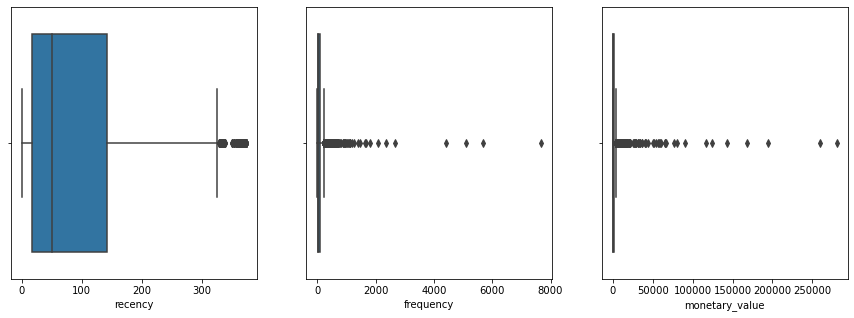

In [104]:
# Outlier Treatment:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(rfm.monetary_value, ax = axs[2])
sns.boxplot(rfm.frequency, ax = axs[1])
sns.boxplot(rfm.recency, ax = axs[0])

plt.tight_layout
plt.show()

In [105]:
# outlier treatment for Amount
Q1 = rfm.monetary_value.quantile(0.25)
Q3 = rfm.monetary_value.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary_value >= Q1 - 1.5*IQR) & (rfm.monetary_value <= Q3 + 1.5*IQR)]

In [106]:
# outlier treatment for Frequency
Q1 = rfm.frequency.quantile(0.25)
Q3 = rfm.frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

In [107]:
# outlier treatment for Recency
Q1 = rfm.recency.quantile(0.25)
Q3 = rfm.recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


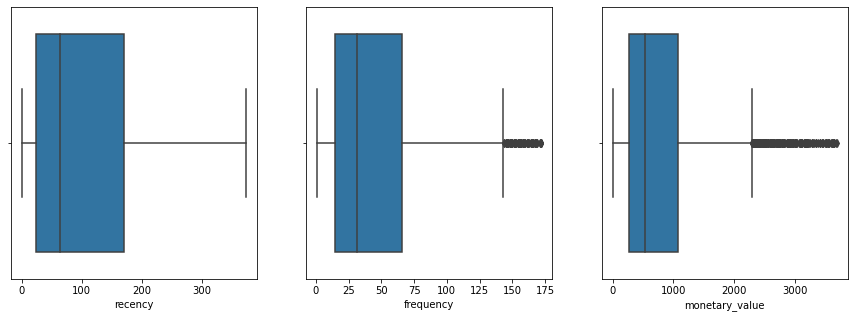

In [108]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(rfm.monetary_value, ax = axs[2])
sns.boxplot(rfm.frequency, ax = axs[1])
sns.boxplot(rfm.recency, ax = axs[0])

plt.tight_layout
plt.show()

In [109]:
rfm.head()

,recency,frequency,monetary_value
CustomerID,,,
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00


After getting the RFM values, I have created 'quartiles' on each of the metrics and assign the required order( and collate these scores into an RFM_Segment column). The RFM_Score is calculated by summing up the RFM quartile metrics.
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers or big spenders.

In [110]:
##rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
#rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, range(4,0,-1))
##rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
##rfm['m_quartile'] = pd.qcut(rfm['monetary_value'], 4, ['4','3','2','1'])
#rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, range(1,5))
#rfm['m_quartile'] = pd.qcut(rfm['monetary_value'], 4, range(1,5))

#rfm['r_percentile'] = rfm['recency'].rank(pct=True,ascending=False)
#rfm['r_quartile'] = pd.qcut(rfm['r_percentile'], 4, labels=range(4,0,-1))
#rfm['f_percentile'] = rfm['frequency'].rank(pct=True,ascending=True)
#rfm['f_quartile'] = pd.qcut(rfm['f_percentile'], 4, labels=range(4,0,-1))
#rfm['m_percentile'] = rfm['monetary_value'].rank(pct=True,ascending=True)
#rfm['m_quartile'] = pd.qcut(rfm['m_percentile'], 4, labels=range(4,0,-1))

#rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
#rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
#rfm['m_quartile'] = pd.qcut(rfm['monetary_value'], 4, ['4','3','2','1'])

#quantiles = rfm.quantile(q=[0.25,0.5,0.75])
#rfm['fq']=pd.cut(rfm['frequency'], bins=[0,1,2,5,rfm['frequency'].max()],labels=False)
#rfm['mq']=pd.cut(rfm['monetary_value'], bins=[0,1,2,5,rfm['monetary_value'].max()],labels=False)
#rfm['rq']=pd.cut(rfm['recency'], bins=[0,1,2,5,rfm['recency']],labels=False)


#rfm['rq'] = 5 - pd.qcut(rfm['recency'], q=5, labels=False)
#def fm_score(series):
#    return (
#        6 - series.sort_values(ascending=False).cumsum() / series.sum() * 5
#    ).astype(int)

#rfm["fq"] = fm_score(rfm["frequency"])
#rfm["mq"] = fm_score(rfm["monetary_value"])

#rfm["rq"] = pd.qcut(rfm['recency'], 5, labels = [5, 4, 3, 2, 1])
#rfm["fq"] = pd.qcut(rfm['frequency'], 5, labels = [1, 2, 3, 4, 5])
#rfm["mq"] = pd.qcut(rfm['monetary_value'], 5, labels = [1, 2, 3, 4, 5])

quantiles = rfm.quantile(q=[0.25,0.5,0.75]).to_dict()
def Rcore(S,P,Q):
    if S > Q[P][0.75]:
        return 1
    elif S > Q[P][0.50]:
        return 2
    elif S > Q[P][0.25]: 
        return 3
    else:
        return 4
    
rfm['r_quartile'] = rfm['recency'].apply(Rcore, args=('recency',quantiles,))
def fmScore(S,P,Q):
    if S > Q[P][0.75]:
        return 4
    elif S > Q[P][0.50]:
        return 3
    elif S > Q[P][0.25]: 
        return 2
    else:
        return 1
    
rfm['f_quartile'] = rfm['frequency'].apply(fmScore, args=('frequency',quantiles,))

rfm['m_quartile'] = rfm['monetary_value'].apply(fmScore, args=('monetary_value',quantiles,))

rfm.head()


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
12352.0,36,85,2506.04,3,4,4
12353.0,204,4,89.00,1,1,1


In [111]:
# Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment 
# the customers well group.

#rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
#rfm.head()

In [112]:
#def join_rfm(x):
#    return str(x['r_quartile']) + str(x['f_quartile']) + str(x['m_quartile'])

#rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
#rfm['RFM_Score'] = rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
#rfm.reset_index(inplace=True)


rfm['RFM_Segment'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)
rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment
CustomerID,,,,,,,
12348.0,75,31,1797.24,2,2,4,224
12349.0,18,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122
12352.0,36,85,2506.04,3,4,4,344
12353.0,204,4,89.00,1,1,1,111


In [113]:
print(rfm['RFM_Segment'].unique())

['224' '444' '122' '344' '111' '134' '112' '434' '424' '223' '123' '411'
 '334' '234' '333' '422' '144' '233' '323' '442' '324' '312' '433' '423'
 '311' '222' '322' '211' '244' '133' '213' '412' '121' '342' '221' '421'
 '343' '332' '321' '413' '443' '243' '114' '214' '231' '212' '313' '414'
 '113' '124' '142' '314' '132' '232' '432' '131' '341' '143' '441' '331'
 '431' '242' '241' '141']


The RFM_Score values will range from 3 (1+1+1) to 12 (4+4+4). So, we can group by the RFM scores and check the mean values of recency, frequency, and monetary corresponding to each score.

In [114]:
rfm['RFM_Score'] = rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)
rfm.groupby('RFM_Score').agg({'recency': 'mean',
                                   'frequency': 'mean',
                                   'monetary_value': ['mean', 'count'] })

recency   frequency monetary_value      
                 mean        mean           mean count
RFM_Score                                             
3          272.829932    7.142857     142.468299   294
4          193.726619   11.751799     201.956079   278
5          170.217002   17.221477     309.668523   447
6          108.830952   20.750000     380.464479   420
7          100.208333   30.734375     552.217711   384
8           76.820276   40.896313     709.593548   434
9           63.877384   56.811989     917.955346   367
10          43.372596   74.574519    1237.511058   416
11          27.391061   96.631285    1687.723324   358
12          10.271698  110.109434    2057.805585   265

we can create segments within this score range of RFM_Score 3–12, by manually creating categories in our data: Customers with an RFM_Score greater than or equal to 11 can be put in the 'Top' category. Similarly, customers with an RFM_Score between 8 to 10 can be put in the 'VIP' category and customers with an RFM_Score between 5 to 7 can be put in the 'Middle' category, and the rest can be put in the 'Low' category. Let us call our categories the 'Segment'.

In [115]:
def create_segment(df):
    if df['RFM_Score'] > 11:
        return 'Big Spenders(VVIP)'
    elif df['RFM_Score'] > 8: 
        return 'VIP'
    elif df['RFM_Score'] > 5:
        return 'medium'
    else:
        return 'Low'
    
rfm['Segment'] = rfm.apply(create_segment, axis=1)
rfm.groupby('Segment').agg({'recency': 'mean',
                                         'frequency': 'mean',
                                         'monetary_value': ['mean', 'count']})

recency   frequency monetary_value      
                          mean        mean           mean count
Segment                                                        
Big Spenders(VVIP)   10.271698  110.109434    2057.805585   265
Low                 206.236506   12.821394     232.042493  1019
VIP                  44.953550   75.781770    1275.985243  1141
medium               94.934572   30.909532     549.119775  1238

Segmented customers further on r_quartile, m_quartile and f_quartile.

In [116]:
#Create Customer Segment Function
def segment_customer(Dataframe):
    if Dataframe['r_quartile'] >3:
        if Dataframe['f_quartile'] >3:
            if Dataframe['m_quartile'] >3:
                return 'Best Customer'
            elif Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Loyal Active Customer'
            else:
                return 'Low-Spending Loyal Active Customer'
        elif Dataframe['f_quartile'] >2:
            if Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Loyal Active Customer'
            else:
                return 'Low-Spending Loyal Active Customer'
        else:
            if Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Active Customer'
            else:
                return 'Low-Spending New Customer'
    elif Dataframe['r_quartile'] >2:
        if Dataframe['f_quartile'] >3:
            if Dataframe['m_quartile'] >3:
                return 'Inactive Best Customer'
            elif Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Loyal Active Customer'
            else:
                return 'Low-Spending Loyal Inactive Customer'
        elif Dataframe['f_quartile'] >2:
            if Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Loyal Active Customer'
            else:
                return 'Low-Spending Loyal Inactive Customer'
        else:
            if Dataframe['m_quartile'] >2:
                return 'Medium/High Spending Active Customer'
            else:
                return 'Low Spending Inactive Customer'
    else:
        if Dataframe['f_quartile'] >3:
            if Dataframe['m_quartile'] >3:
                return 'Eroded Best Customer'
            elif Dataframe['m_quartile'] >2:
                return 'Eroded Loyal Customer'
            else:
                return 'Eroded Frequent Customer'
        elif Dataframe['f_quartile'] >2:
            if Dataframe['m_quartile'] >2:
                return 'Eroded Loyal Customer'
            else:
                return 'Eroded Frequent Customer'
        else:
            if Dataframe['m_quartile'] >2:
                return 'Eroded Medium-High Spender'
            else:
                return 'Eroded Low Spending Infrequent Customer'   
rfm['CustomerSegment'] = rfm.apply(segment_customer, axis=1)
rfm['CustomerSegment'].value_counts()

Eroded Low Spending Infrequent Customer       985
Medium/High Spending Loyal Active Customer    527
Eroded Loyal Customer                         329
Low Spending Inactive Customer                286
Best Customer                                 265
Eroded Medium-High Spender                    205
Low-Spending New Customer                     203
Inactive Best Customer                        196
Medium/High Spending Active Customer          166
Eroded Frequent Customer                      152
Eroded Best Customer                          143
Low-Spending Loyal Inactive Customer          106
Low-Spending Loyal Active Customer            100
Name: CustomerSegment, dtype: int64

13 unique customer segments mapped
Churned Low Spending Infrequent Customer segment had 985 of 3662 customers
Low-Spending Active Loyal Customer segment had 100 of 3662 customers

# Data Modeling :

1. In this section I have created clusters using k-means clustering algorithm.
    a. Prepared the data for the algorithm. If the data is asymmetrically distributed, managing the skewness with appropriate          transformation. Standardized the data.
    b. Decided the optimum number of clusters to be formed.
    c. Analyzed these clusters and commenting on the results.

As we want to properly find out segments on our RFM values, I have used a clustering algorithm like K-means.
The algorithm makes certain assumptions about the data. Therefore, we need to preprocess the data so that it can meet the key assumptions of the algorithm, which are:
1> The variables should be distributed symmetrically.
2> Variables should have similar average values.
3> Variables should have similar standard deviation values.

In [117]:
# Checking for constant mean and variance.
rfm[['recency','frequency','monetary_value']].describe()

,recency,frequency,monetary_value
count,3663.000000,3663.000000,3663.000000
mean,104.203658,45.584767,796.472625
std,102.833661,40.243183,750.042368
min,0.000000,1.000000,0.000000
25%,23.000000,14.500000,261.290000
50%,63.000000,31.000000,528.480000
75%,170.000000,66.000000,1071.260000
max,373.000000,172.000000,3683.860000


We do not get a constant mean and standard deviation values. To check that, I have standardized the data.
We can see that the minimum MonetaryValue for a particular customerID is 0. This transaction therefore does not make any sense and needs to be removed.
Removed the customer with 0 MonetaryValue from the data.

In [118]:
rfm[rfm['monetary_value'] == 0]

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment
CustomerID,,,,,,,,,,
13256.0,14,1,0.0,4,1,1,411,6,medium,Low-Spending New Customer


In [119]:
rfm = rfm[rfm['monetary_value'] > 0]
#rfm.reset_index(drop=True,inplace=True)

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

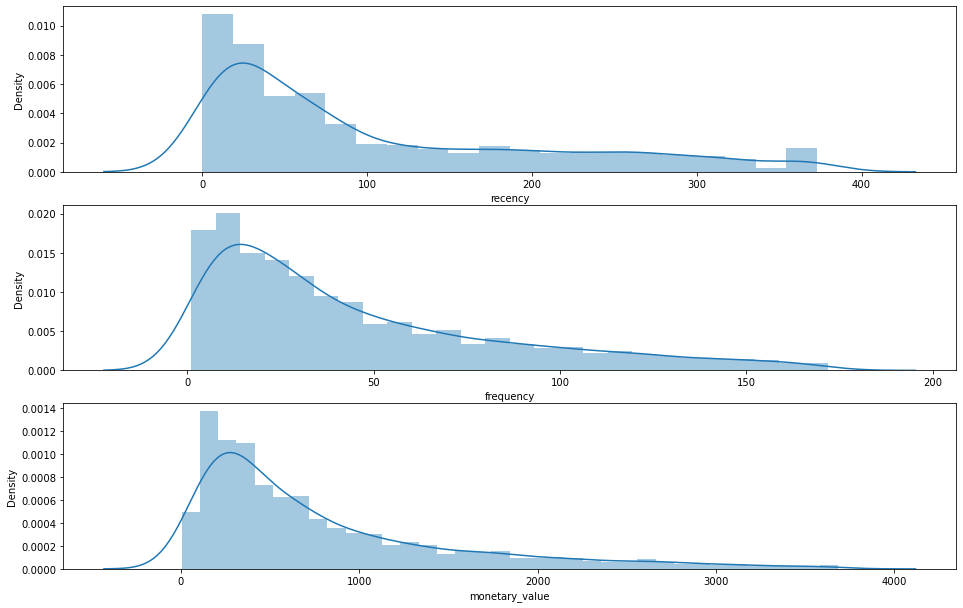

In [120]:
# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribution of R
plt.subplot(4, 1, 1); sns.distplot(rfm['recency'])
# Plot distribution of F
plt.subplot(4, 1, 2); sns.distplot(rfm['frequency'])
# Plot distribution of M
plt.subplot(4, 1, 3); sns.distplot(rfm['monetary_value'])
# Show the plot
plt.show()

From the above figure, we can see that all the RFM variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness, I have used boxcox transformations. 

In [121]:
rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment
CustomerID,,,,,,,,,,
12348.0,75,31,1797.24,2,2,4,224,8,medium,Eroded Medium-High Spender
12349.0,18,73,1757.55,4,4,4,444,12,Big Spenders(VVIP),Best Customer
12350.0,310,17,334.40,1,2,2,122,5,Low,Eroded Low Spending Infrequent Customer
12352.0,36,85,2506.04,3,4,4,344,11,VIP,Inactive Best Customer
12353.0,204,4,89.00,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer


C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

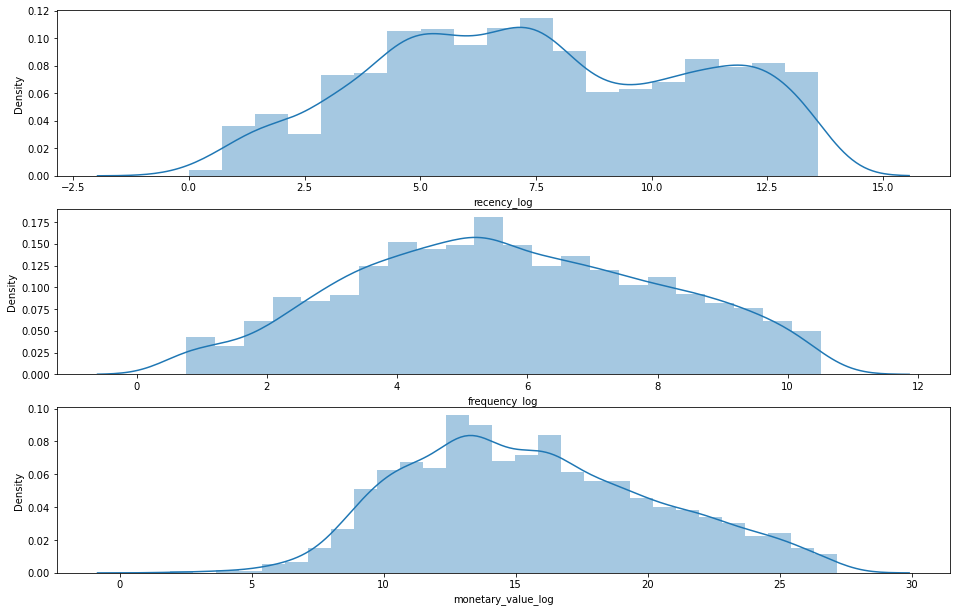

In [122]:
from scipy.stats import boxcox
from scipy.special import boxcox1p

# Apply Log Transformation
#np.seterr(divide = 'ignore')
##rfm1['monetary_value'] = rfm1['monetary_value'] + 0.0000000001
#rfm['recency_log'] = np.sqrt(rfm['recency'])
rfm['recency_log'] = boxcox1p(rfm['recency'],0.25)
#rfm['recency_log'] = rfm['recency_log'].replace([np.inf, -np.inf, -0], 0)

rfm['frequency_log'] = boxcox1p(rfm['frequency'],0.25)
#rfm['frequency_log'] = rfm['frequency_log'].replace([np.inf, -np.inf, -0], 0)

rfm['monetary_value_log'] = boxcox1p(rfm['monetary_value'],0.25)

#rfm=np.log(rfm)

# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribution of R
plt.subplot(4, 1, 1); 
sns.distplot(rfm['recency_log'])
# Plot distribution of F
plt.subplot(4, 1, 2); 
sns.distplot(rfm['frequency_log'])
# Plot distribution of M
plt.subplot(4, 1, 3);
sns.distplot(rfm['monetary_value_log'])

# Show the plot
plt.show()

As we can see from the above plots, normal distribution can be seen.

In [123]:
rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log
CustomerID,,,,,,,,,,,,,
12348.0,75,31,1797.24,2,2,4,224,8,medium,Eroded Medium-High Spender,7.810367,5.513657,22.047851
12349.0,18,73,1757.55,4,4,4,444,12,Big Spenders(VVIP),Best Customer,4.351191,7.731888,21.902917
12350.0,310,17,334.40,1,2,2,122,5,Low,Eroded Low Spending Infrequent Customer,12.797710,4.239069,13.117911
12352.0,36,85,2506.04,3,4,4,344,11,VIP,Inactive Best Customer,5.865303,8.181047,24.304162
12353.0,204,4,89.00,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer,11.135559,1.981395,8.320281


In [827]:
#rfm1 = pd.DataFrame(data=rfm, columns=['CustomerID','recency','frequency','monetary_value'])
#scaler = StandardScaler()
#scaler.fit(rfm1)
#data_normalized = scaler.transform(rfm1)

#rfm1.set_index("CustomerID",inplace=True)
#rfm1.head()

In [124]:
rfmsh = pd.DataFrame(data=rfm, columns=['CustomerID','recency_log','frequency_log','monetary_value_log'])
rfmsh.set_index("CustomerID",inplace=False)
scaler = StandardScaler()
rfmScaled = scaler.fit_transform(rfmsh) 
rfmScaled = pd.DataFrame(data=rfmScaled, index=rfmsh.index, columns=rfmsh.columns)
rfmScaled.head()

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,CustomerID,recency_log,frequency_log,monetary_value_log
CustomerID,,,,
12348.0,NaN,0.091574,-0.070911,1.356972
12349.0,NaN,-0.928255,0.878481,1.326263
12350.0,NaN,1.561934,-0.616428,-0.535150
12352.0,NaN,-0.481867,1.070718,1.835051
12353.0,NaN,1.071901,-1.582701,-1.551696


In [125]:
rfmScaled=rfmScaled.drop(['CustomerID'],axis=1)

I have built multiple clusters upon our normalized RFM data and found out the optimal number of clusters in our data using the elbow method.

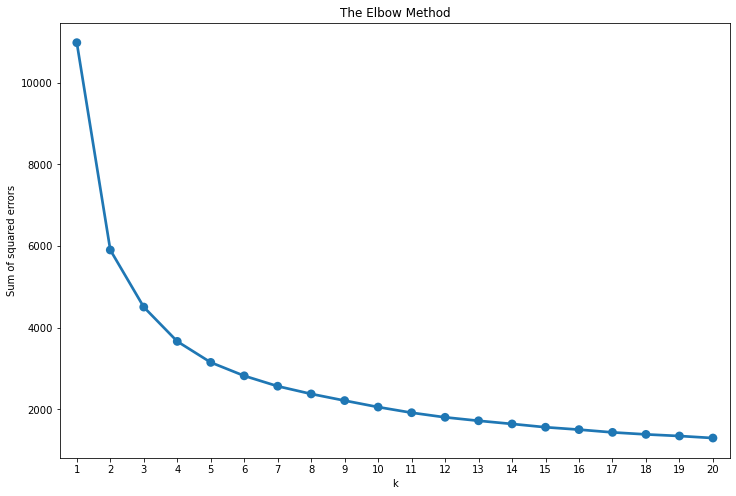

In [126]:
#rfmScaled.fillna(-99999, inplace=True)
#rfmScaled = rfmScaled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#rfmScaled = rfmScaled.reset_index()
from sklearn.cluster import KMeans
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1,init = 'k-means++')
    
    # Fit KMeans on the normalized dataset
    
    kmeans.fit(rfmScaled)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the above plot, we can see that the optimal number of cluster is 4 or 5. I have taken 4 to build the model.

In [127]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(rfmScaled)
clusterLabels = kmeans.labels_
pred = kmeans.predict(rfmScaled)

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [128]:
kmeans

KMeans(n_clusters=4, n_jobs=-1)

In [129]:
clusterLabels

array([1, 3, 2, ..., 2, 0, 3])

In [130]:
clusterLabels.shape

(3662,)

In [131]:
rfm.shape

(3662, 13)

In [132]:
# Assign the clusters as column to each customer
newdf = rfm.assign(Cluster = clusterLabels)
newdf.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log,Cluster
CustomerID,,,,,,,,,,,,,,
12348.0,75,31,1797.24,2,2,4,224,8,medium,Eroded Medium-High Spender,7.810367,5.513657,22.047851,1
12349.0,18,73,1757.55,4,4,4,444,12,Big Spenders(VVIP),Best Customer,4.351191,7.731888,21.902917,3
12350.0,310,17,334.40,1,2,2,122,5,Low,Eroded Low Spending Infrequent Customer,12.797710,4.239069,13.117911,2
12352.0,36,85,2506.04,3,4,4,344,11,VIP,Inactive Best Customer,5.865303,8.181047,24.304162,3
12353.0,204,4,89.00,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer,11.135559,1.981395,8.320281,2


In [133]:
km_clusters_recency = pd.DataFrame(newdf.groupby(["Cluster"]).recency.mean())
km_clusters_frequency = pd.DataFrame(newdf.groupby(["Cluster"]).frequency.mean())
km_clusters_amount = pd.DataFrame(newdf.groupby(["Cluster"]).monetary_value.mean())
shdf = pd.concat([pd.Series([0,1,2,3]), km_clusters_recency, km_clusters_frequency, km_clusters_amount], axis=1)
shdf.columns = ["ClusterID","Recency_mean","Frequency_mean","Amount_mean"]
shdf.head()

,ClusterID,Recency_mean,Frequency_mean,Amount_mean
0,0,34.186528,23.818653,384.572343
1,1,137.182482,50.114355,885.282533
2,2,228.783224,13.218954,248.808181
3,3,27.071055,94.735632,1661.712394


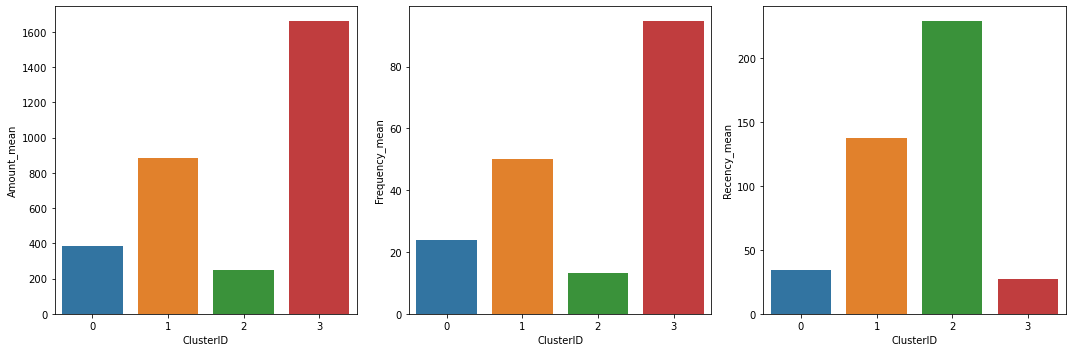

In [134]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=shdf.ClusterID, y=shdf.Amount_mean, ax = axs[0])
sns.barplot(x=shdf.ClusterID, y=shdf.Frequency_mean, ax = axs[1])
sns.barplot(x=shdf.ClusterID, y=shdf.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

Inferences: We can see that Customers with Cluster ID 3 are the best(frequently spent big amount of money) but they have not purchased anything recently . We need to target these customers. People with cluster ID 2 have purchased recently but spent less money and visited frequently. We should target these customers too. People with cluster ID 1 have spent more money than cluster 2 customers and they are frequent customers.We should target these customers too.People with cluster ID 0 are probably new customers visited recently but spent little and are frequent. 

In [135]:
# Compute counts of CustomerIDs assigned to different clusters
ClusterDataCount = newdf.Cluster.value_counts().sort_index().rename_axis('Clu').reset_index(name='CustomerIDCount')
ClusterDataCount.Clu = ClusterDataCount.astype(str)
ClusterDataCount.Clu = "Cluster " + ClusterDataCount.Clu
ClusterDataCount.head()

,Clu,CustomerIDCount
0,Cluster 0,965
1,Cluster 1,822
2,Cluster 2,918
3,Cluster 3,957


Four clusters created with sizes equal to Cluster 0: 965 Cluster 1: 822 Cluster 2: 918 Cluster 3: 957

In [136]:
newdf[newdf.Cluster == 0].sample(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log,Cluster
CustomerID,,,,,,,,,,,,,,
13705.0,7,28,711.86,4,2,3,423,9,VIP,Medium/High Spending Active Customer,2.727171,5.282383,16.668600,0
17650.0,21,8,166.08,4,1,1,411,6,medium,Low-Spending New Customer,4.662947,2.928203,10.381067,0
17895.0,44,15,95.45,3,2,1,321,6,medium,Low Spending Inactive Customer,6.360080,4.000000,8.535324,0
17977.0,29,21,288.14,3,2,2,322,7,medium,Low Spending Inactive Customer,5.361389,4.662947,12.494419,0
18042.0,53,7,165.05,3,1,1,311,5,Low,Low Spending Inactive Customer,6.843224,2.727171,10.358852,0
13897.0,50,17,311.16,3,2,2,322,7,medium,Low Spending Inactive Customer,6.689380,4.239069,12.813352,0
16189.0,15,11,215.48,4,1,1,411,6,medium,Low-Spending New Customer,4.000000,3.444839,11.343147,0
13560.0,7,32,171.42,4,3,1,431,8,medium,Low-Spending Loyal Active Customer,2.727171,5.587127,10.494622,0
13727.0,28,20,333.48,3,2,2,322,7,medium,Low Spending Inactive Customer,5.282383,4.562781,13.106160,0


In [137]:
newdf[newdf.Cluster == 1].sample(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log,Cluster
CustomerID,,,,,,,,,,,,,,
17429.0,128,39,524.92,2,3,2,232,7,medium,Eroded Frequent Customer,9.480544,6.059467,15.155342,1
16573.0,84,42,663.61,2,3,3,233,8,medium,Eroded Loyal Customer,8.145481,6.242998,16.309616,1
16398.0,154,82,1705.80,2,4,4,244,10,VIP,Eroded Best Customer,10.113766,8.073398,21.710212,1
16235.0,40,46,867.31,3,3,3,333,9,VIP,Medium/High Spending Loyal Active Customer,6.121758,6.473322,17.713443,1
15260.0,100,77,1810.77,2,4,4,244,10,VIP,Eroded Best Customer,8.680616,7.887311,22.096710,1
16820.0,95,26,497.61,2,2,2,222,6,medium,Eroded Low Spending Infrequent Customer,8.520677,5.118028,14.901673,1
15457.0,262,58,237.07,1,3,1,131,5,Low,Eroded Frequent Customer,12.108271,7.085952,11.712170,1
16480.0,75,53,769.29,2,3,3,233,8,medium,Eroded Loyal Customer,7.810367,6.843224,17.072864,1
12818.0,261,14,1542.08,1,1,4,114,6,medium,Eroded Medium-High Spender,12.092937,3.871959,21.070160,1


In [138]:
newdf[newdf.Cluster == 2].sample(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log,Cluster
CustomerID,,,,,,,,,,,,,,
14603.0,274,2,660.00,1,1,3,113,5,Low,Eroded Medium-High Spender,12.288953,1.264296,16.281980,2
15917.0,247,12,123.10,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer,11.873508,3.595316,9.350666,2
13645.0,120,5,252.10,2,1,1,211,4,Low,Eroded Low Spending Infrequent Customer,9.266499,2.260338,11.954494,2
16217.0,235,15,304.25,1,2,2,122,5,Low,Eroded Low Spending Infrequent Customer,11.677904,4.000000,12.719524,2
16202.0,360,18,365.27,1,2,2,122,5,Low,Eroded Low Spending Infrequent Customer,13.435596,4.351191,13.498883,2
14196.0,106,6,335.52,2,1,2,212,5,Low,Eroded Low Spending Infrequent Customer,8.864886,2.506306,13.132183,2
16159.0,281,14,348.20,1,1,2,112,4,Low,Eroded Low Spending Infrequent Customer,12.391635,3.871959,13.291336,2
15160.0,357,4,158.16,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer,13.399259,1.981395,10.207526,2
17879.0,173,6,178.52,1,1,1,111,3,Low,Eroded Low Spending Infrequent Customer,10.527715,2.506306,10.641589,2


In [139]:
newdf[newdf.Cluster == 3].sample(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,Segment,CustomerSegment,recency_log,frequency_log,monetary_value_log,Cluster
CustomerID,,,,,,,,,,,,,,
12940.0,54,96,899.69,3,4,3,343,10,VIP,Medium/High Spending Loyal Active Customer,6.893079,8.553156,17.913100,3
13685.0,2,39,3119.44,4,3,4,434,11,VIP,Medium/High Spending Loyal Active Customer,1.264296,6.059467,25.896060,3
17350.0,8,70,1281.32,4,4,4,444,12,Big Spenders(VVIP),Best Customer,2.928203,7.611132,19.936414,3
17667.0,66,117,2055.51,2,4,4,244,10,VIP,Eroded Best Customer,7.444022,9.183493,22.936595,3
13692.0,24,53,1488.32,3,3,4,334,10,VIP,Medium/High Spending Loyal Active Customer,4.944272,6.843224,20.848890,3
14794.0,2,80,1319.91,4,4,4,444,12,Big Spenders(VVIP),Best Customer,1.264296,8.000000,20.114502,3
12381.0,4,87,1845.31,4,4,4,444,12,Big Spenders(VVIP),Best Customer,1.981395,8.251257,22.220209,3
14629.0,4,150,955.26,4,4,3,443,11,VIP,Medium/High Spending Loyal Active Customer,1.981395,10.021815,18.243544,3
18257.0,39,118,2337.63,3,4,4,344,11,VIP,Inactive Best Customer,6.059467,9.211336,23.816365,3


In [140]:
selection = newdf[['Cluster', 'Segment', 'CustomerSegment']]
print(selection)

            Cluster             Segment  \
CustomerID                                
12348.0           1              medium   
12349.0           3  Big Spenders(VVIP)   
12350.0           2                 Low   
12352.0           3                 VIP   
12353.0           2                 Low   
...             ...                 ...   
18278.0           2                 Low   
18280.0           2                 Low   
18281.0           2                 Low   
18282.0           0              medium   
18287.0           3                 VIP   

                                    CustomerSegment  
CustomerID                                           
12348.0                  Eroded Medium-High Spender  
12349.0                               Best Customer  
12350.0     Eroded Low Spending Infrequent Customer  
12352.0                      Inactive Best Customer  
12353.0     Eroded Low Spending Infrequent Customer  
...                                             ...  
18278.0 

In [141]:
selection[selection['Cluster'] == 0].value_counts()

Cluster  Segment  CustomerSegment                           
0        medium   Low-Spending New Customer                     202
                  Low Spending Inactive Customer                178
         Low      Low Spending Inactive Customer                 98
         VIP      Medium/High Spending Loyal Active Customer     79
         medium   Low-Spending Loyal Inactive Customer           69
                  Eroded Low Spending Infrequent Customer        67
                  Medium/High Spending Active Customer           65
         VIP      Medium/High Spending Active Customer           51
         Low      Eroded Low Spending Infrequent Customer        50
         VIP      Low-Spending Loyal Active Customer             49
         medium   Low-Spending Loyal Active Customer             28
                  Eroded Medium-High Spender                     13
         VIP      Low-Spending Loyal Inactive Customer            9
         medium   Eroded Frequent Customer             

In Cluster0, there are primarily "new customers currently low spending" that can be targeted.

In [142]:
selection[selection['Cluster'] == 1].value_counts()

Cluster  Segment  CustomerSegment                           
1        medium   Eroded Loyal Customer                         240
                  Eroded Medium-High Spender                    139
                  Eroded Frequent Customer                      103
         VIP      Medium/High Spending Loyal Active Customer     84
                  Eroded Loyal Customer                          82
                  Eroded Best Customer                           69
         medium   Eroded Low Spending Infrequent Customer        26
         Low      Eroded Low Spending Infrequent Customer        22
         medium   Medium/High Spending Active Customer           16
         VIP      Low-Spending Loyal Inactive Customer           14
                  Medium/High Spending Active Customer           12
         medium   Low-Spending Loyal Inactive Customer            7
         Low      Eroded Frequent Customer                        4
                  Eroded Medium-High Spender           

In Cluster1,there are primarily "eroded loyal customers", it will be helpful to find reason behind it.

In [143]:
selection[selection['Cluster'] == 2].value_counts()

Cluster  Segment  CustomerSegment                        
2        Low      Eroded Low Spending Infrequent Customer    787
         medium   Eroded Low Spending Infrequent Customer     33
                  Eroded Medium-High Spender                  27
         Low      Eroded Medium-High Spender                  23
                  Eroded Frequent Customer                    22
         medium   Eroded Frequent Customer                    16
         Low      Low Spending Inactive Customer              10
dtype: int64

In Cluser2, there are primarily, "eroded low spending infrequent customers", they can be targeted to move them in frequent and loyal group.

In [144]:
selection[selection['Cluster'] == 3].value_counts()

Cluster  Segment             CustomerSegment                           
3        VIP                 Medium/High Spending Loyal Active Customer    364
         Big Spenders(VVIP)  Best Customer                                 265
         VIP                 Inactive Best Customer                        195
                             Eroded Best Customer                           74
                             Low-Spending Loyal Active Customer             23
                             Medium/High Spending Active Customer           21
                             Low-Spending Loyal Inactive Customer            7
                             Eroded Loyal Customer                           7
         medium              Medium/High Spending Active Customer            1
dtype: int64

In Cluser2,there are primarily,"Medium/High Spending Loyal Active Customer", they have to be actively retained and "inactive best customers" can be made to return with some special offers.